# **Clustering (Grupiranje)**

https://scikit-learn.org/stable/modules/clustering.html#clustering

---

## 1. Problem

Pronalazak klasa (grupa) u podacima za koje nisu određene grupe.

## 2. Primjer primjene: Procjena stanja prometne mreže

- Podatci: Brzina i gustoća mjereni na promatranoj autocesti.
- Iz podataka je vidljivo da ćemo za grupiranje koristiti dva atributa: brzinu i gustoću.
- Pitanje koje želimo odgovoriti: "Postoje li grupe (klase) u podacima? Ako da, koje su to grupe?"
- Ako je odgovor na prošlo pitanje pozitivan, koristiti ćemo svoje ekspertno znanje da objasnimo značenje grupa.



## 3. Učitavanje potrebnih Python paketa

In [11]:
# Packages imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## 3. Učitavanje podataka
### a) Spajanje sa Google Drive-om

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### b) Učitavanje podataka

In [7]:
# Path to folder at google drive. 
path = 'drive/MyDrive/RADIONICA_FPZ_Datalab/Podatci/'

# Read data from path to pandas dataframe.
data = pd.read_csv(f"{path}clustering.csv", index_col=0)

data

,speed,density
0,41.744769,67.229948
1,53.837614,71.987984
2,55.346193,72.653424
3,42.658655,66.338272
4,55.776065,75.498094
...,...,...
195,63.656245,51.248524
196,40.313447,69.568064
197,63.006874,55.439973
198,55.820553,68.956649


## 4. Vizualizacija ulaznih podataka

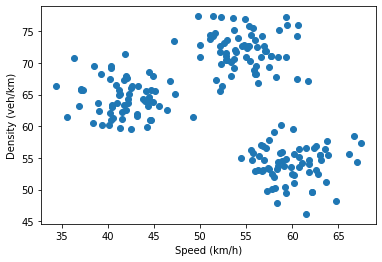

In [10]:
# Plot dataset.
plt.scatter(data["speed"], data["density"])
plt.xlabel("Speed (km/h)")
plt.ylabel("Density (veh/km)")
plt.show()

## 5. Algoritam grupiranja

- Za grupiranje ćemo koristiti K-Means algoritam. Detalje o algoritmu pronađite ovdje: https://scikit-learn.org/stable/modules/clustering.html#k-means
- Koristimo ga zato što je dobar za grupiranje 2-D podataka i vizualno je jednostavan.

## 5.1. Određivanje broja *k*
- Ako želimo koristiti K-Means algoritam, moramo unaprijed znati u koliko grupa ćemo grupirati podatke.
- Broj grupa označava se brojem *k*.
- Broj grupa *k* se može odrediti vizualno (vizualizacijom podataka) ili korištenjem metoda kao što su Elbow method, Siluete method i slične.

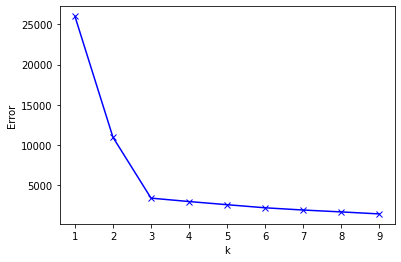

In [14]:
# Number of clusters estimation using Elbow method.
# Run K-Means for k=1, k=2, k=3, ..., k=10 and plot errors.
# Best k is where the error is minimal.
errors = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    errors.append(kmeanModel.inertia_)

plt.figure()
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

## 5.2. Pokretanje algoritma grupiranja

- Koristiti ćemo Python-ov paket za machine learning koji se zove *scikit-learn*.
- *scikit-learn* sadrži gotove algoritme spremne za korištenje kao "black box". To znaći da ne moramo znati točnu implementaciju algoritma da bi ga koristili. Moramo razumjeti svrhu algoritma i njegove ulaze/izlaze.

In [15]:
y_pred = KMeans(n_clusters=3, random_state=10).fit_predict(data)
print(y_pred)

[0 2 2 0 2 0 1 1 2 0 2 0 2 2 2 0 1 1 2 0 0 1 2 2 0 2 1 0 0 0 2 2 0 2 1 1 2
 1 1 0 1 0 0 0 2 2 2 0 2 2 2 1 0 0 0 0 1 1 2 2 0 0 2 1 1 0 1 1 0 1 1 2 2 0
 2 0 1 1 1 0 0 2 2 1 1 2 2 0 2 1 0 0 1 2 1 2 2 0 0 1 1 2 0 2 0 2 1 2 2 1 2
 0 1 0 2 2 2 1 0 0 1 1 0 2 1 2 0 1 0 2 0 1 1 1 2 1 1 2 1 0 0 0 2 1 1 2 0 0
 1 2 1 0 0 0 2 1 1 1 2 2 0 0 0 0 2 2 1 0 1 1 2 1 2 1 0 0 2 0 2 1 2 0 1 1 1
 2 0 1 2 2 0 0 1 1 1 1 0 1 2 1]


## 5.3. Vizualizacija rezultata


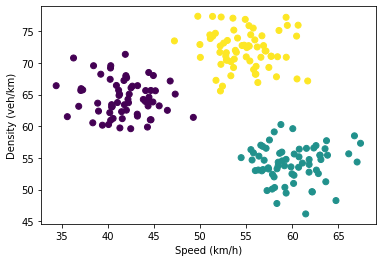

In [17]:
# Plot dataset.
plt.scatter(data["speed"], data["density"], c=y_pred)
plt.xlabel("Speed (km/h)")
plt.ylabel("Density (veh/km)")
plt.show()

## 5.4. Tumačenje rezultata

- Algoritam grupiranja nap pokazuje grupe (klase) podataka ali ne i njihovo značenje. 
- Za tumačenje rezultata potrebno je konzultirati se sa stručnjakom iz područja koje se proučava.
- Pitanje za buduće prometne stručnjake: ```Kako možemo tumačiti tri klase prometnog stanja kojeg smo dobili?```